In [1]:
# Import libraries

# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'C:\Users\chris\Downloads\movies.csv')



In [54]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [56]:
#See if missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [10]:
print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [3]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0).astype(int)
df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(0).astype(int) 

In [5]:
df = df.dropna()

In [7]:
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [9]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [11]:
df = df.sort_values(by=['gross'], inplace = False, ascending = False)

In [13]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,2019
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0,2015
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0,2012


In [28]:
pd.set_option('display.max_rows', None)

In [68]:
df = df['company'].drop_duplicates().sort_values(ascending = False)

In [15]:
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,2019
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0,2015
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,Scream,R,Horror,1981,"January 1, 1981 (United States)",2.9,674.0,Byron Quisenberry,Byron Quisenberry,Pepper Martin,United States,0,0,Calendar International Pictures,82.0,1981
1825,Strangers in Good Company,PG,Drama,1990,1990 (Canada),7.7,995.0,Cynthia Scott,Gloria Demers,Alice Diabo,Canada,0,0,National Film Board of Canada (NFB),101.0,1990
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,-2147483648,Twentieth Century Fox,162.0,2009
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,-2147483648,Twentieth Century Fox,194.0,1997


In [36]:
df.head()

7129                     thefyzz
5664                 micro_scope
6412    iDeal Partners Film Fund
4007                    i5 Films
6793                  i am OTHER
Name: company, dtype: object

In [17]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,2019
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0,2015
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,Scream,R,Horror,1981,"January 1, 1981 (United States)",2.9,674.0,Byron Quisenberry,Byron Quisenberry,Pepper Martin,United States,0,0,Calendar International Pictures,82.0,1981
1825,Strangers in Good Company,PG,Drama,1990,1990 (Canada),7.7,995.0,Cynthia Scott,Gloria Demers,Alice Diabo,Canada,0,0,National Film Board of Canada (NFB),101.0,1990
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,-2147483648,Twentieth Century Fox,162.0,2009
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,-2147483648,Twentieth Century Fox,194.0,1997


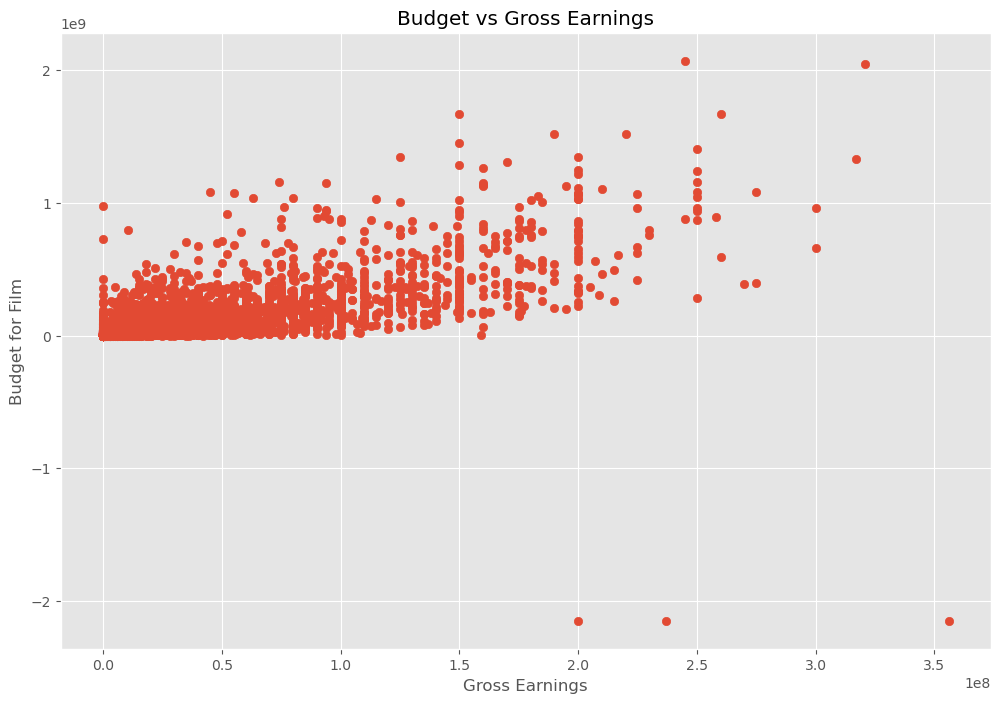

In [25]:
plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Budget for Film')

plt.show()

In [23]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,2019
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0,2015
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0,2012


<Axes: xlabel='gross', ylabel='budget'>

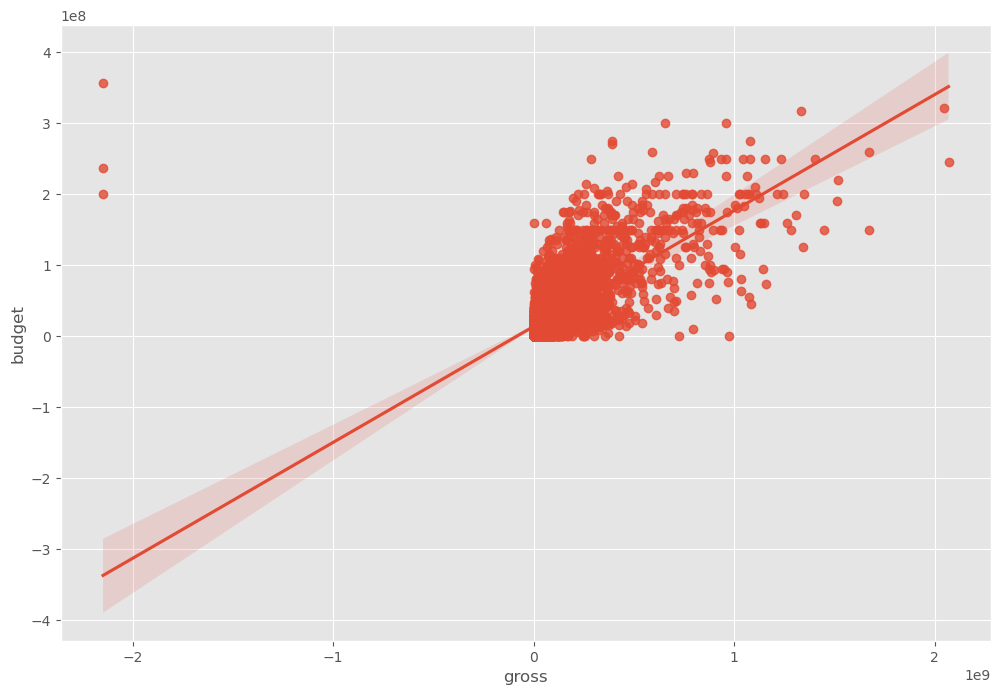

In [27]:
sns.regplot(x="gross", y="budget", data=df)

<Axes: xlabel='gross', ylabel='budget'>

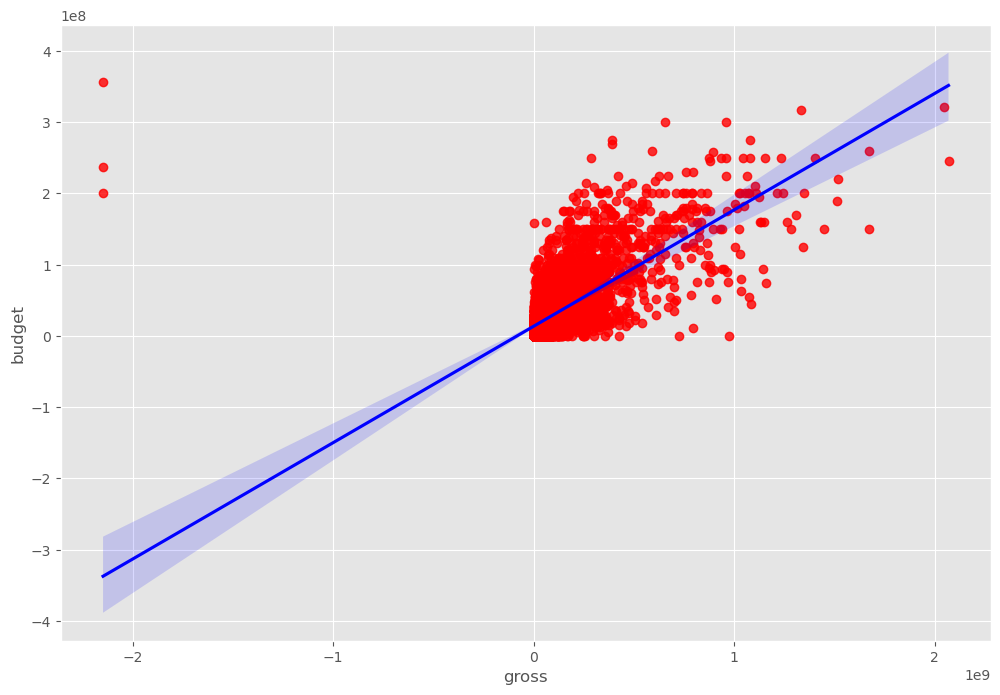

In [29]:
sns.regplot(x="gross", y="budget", data=df, scatter_kws={"color": "red"}, line_kws={"color":"blue"})

In [35]:
df.corr(numeric_only = True)

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.102346,0.226895,0.314842,0.259044,0.120676,0.997466
score,0.102346,1.000000,0.411931,0.056781,0.171122,0.400574,0.109815
votes,0.226895,0.411931,1.000000,0.485301,0.573871,0.309366,0.222317
budget,0.314842,0.056781,0.485301,1.000000,0.687292,0.270042,0.305530
gross,0.259044,0.171122,0.573871,0.687292,1.000000,0.203564,0.252184
runtime,0.120676,0.400574,0.309366,0.270042,0.203564,1.000000,0.120370
yearcorrect,0.997466,0.109815,0.222317,0.305530,0.252184,0.120370,1.000000


In [43]:
df.corr(method = 'pearson', numeric_only = True)

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.102346,0.226895,0.314842,0.259044,0.120676,0.997466
score,0.102346,1.000000,0.411931,0.056781,0.171122,0.400574,0.109815
votes,0.226895,0.411931,1.000000,0.485301,0.573871,0.309366,0.222317
budget,0.314842,0.056781,0.485301,1.000000,0.687292,0.270042,0.305530
gross,0.259044,0.171122,0.573871,0.687292,1.000000,0.203564,0.252184
runtime,0.120676,0.400574,0.309366,0.270042,0.203564,1.000000,0.120370
yearcorrect,0.997466,0.109815,0.222317,0.305530,0.252184,0.120370,1.000000


In [39]:
df.corr(method = 'kendall', numeric_only = True)

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.070606,0.339302,0.214967,0.221150,0.096862,0.987926
score,0.070606,1.000000,0.304058,-0.004328,0.091155,0.284159,0.075996
votes,0.339302,0.304058,1.000000,0.436356,0.557816,0.198342,0.333672
budget,0.214967,-0.004328,0.436356,1.000000,0.539040,0.177497,0.205863
gross,0.221150,0.091155,0.557816,0.539040,1.000000,0.174819,0.210812
runtime,0.096862,0.284159,0.198342,0.177497,0.174819,1.000000,0.096570
yearcorrect,0.987926,0.075996,0.333672,0.205863,0.210812,0.096570,1.000000


In [41]:
df.corr(method = 'spearman', numeric_only = True)

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.103391,0.482954,0.299861,0.322086,0.142587,0.997455
score,0.103391,1.000000,0.433536,-0.006236,0.133354,0.400655,0.111370
votes,0.482954,0.433536,1.000000,0.600785,0.750184,0.290511,0.475817
budget,0.299861,-0.006236,0.600785,1.000000,0.713716,0.249102,0.287158
gross,0.322086,0.133354,0.750184,0.713716,1.000000,0.253812,0.307334
runtime,0.142587,0.400655,0.290511,0.249102,0.253812,1.000000,0.142367
yearcorrect,0.997455,0.111370,0.475817,0.287158,0.307334,0.142367,1.000000


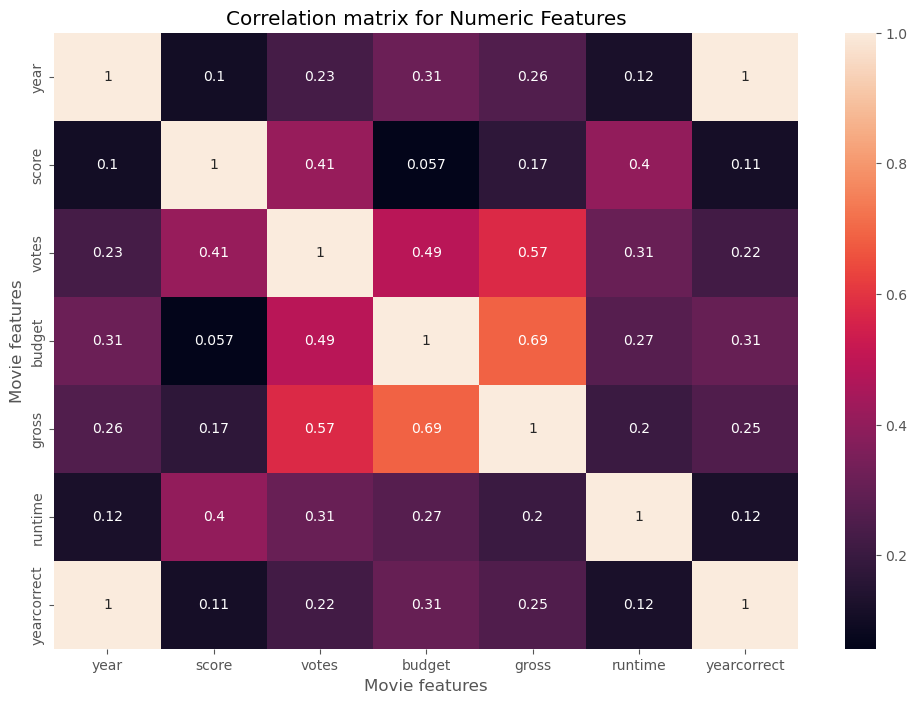

In [47]:
correlation_matrix = df.corr(numeric_only = True)

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [49]:
df_numerized = df

In [51]:
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
6663,5075,5,0,2015,690,7.8,876000.0,1107,2518,508,55,245000000,2069521700,1505,138.0,2015
7244,530,5,0,2018,189,8.4,897000.0,160,729,2192,55,321000000,2048359754,1571,149.0,2018
7480,6114,4,2,2019,1468,6.9,222000.0,1433,1895,657,55,260000000,1670727580,2270,118.0,2019
6653,2939,5,0,2015,1684,7.0,593000.0,507,3522,424,55,150000000,1670516444,2236,124.0,2015
6043,5427,5,0,2012,2444,8.0,1300000.0,1494,2286,2192,55,220000000,1518815515,1571,143.0,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,4689,6,9,1981,1108,2.9,674.0,358,567,2059,55,0,0,525,82.0,1981
1825,5144,4,6,1990,5,7.7,995.0,527,1493,74,6,0,0,1664,101.0,1990
5445,527,5,0,2009,688,7.8,1100000.0,1137,1756,2283,55,237000000,-2147483648,2208,162.0,2009
3045,6811,5,6,1997,696,7.8,1100000.0,1137,1756,1560,55,200000000,-2147483648,2208,194.0,1997


In [53]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
6663,5075,5,0,2015,690,7.8,876000.0,1107,2518,508,55,245000000,2069521700,1505,138.0,2015
7244,530,5,0,2018,189,8.4,897000.0,160,729,2192,55,321000000,2048359754,1571,149.0,2018
7480,6114,4,2,2019,1468,6.9,222000.0,1433,1895,657,55,260000000,1670727580,2270,118.0,2019
6653,2939,5,0,2015,1684,7.0,593000.0,507,3522,424,55,150000000,1670516444,2236,124.0,2015
6043,5427,5,0,2012,2444,8.0,1300000.0,1494,2286,2192,55,220000000,1518815515,1571,143.0,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,4689,6,9,1981,1108,2.9,674.0,358,567,2059,55,0,0,525,82.0,1981
1825,5144,4,6,1990,5,7.7,995.0,527,1493,74,6,0,0,1664,101.0,1990
5445,527,5,0,2009,688,7.8,1100000.0,1137,1756,2283,55,237000000,-2147483648,2208,162.0,2009
3045,6811,5,6,1997,696,7.8,1100000.0,1137,1756,1560,55,200000000,-2147483648,2208,194.0,1997


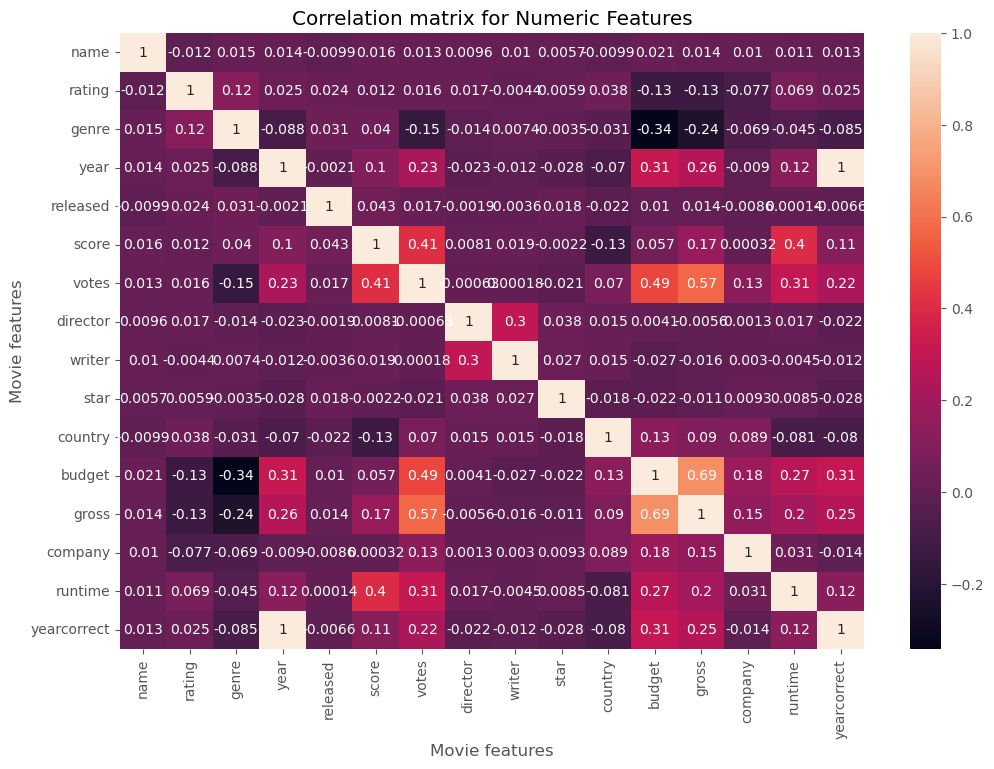

In [55]:
correlation_matrix = df_numerized.corr(numeric_only = True)

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [57]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.011924,0.015300,0.013514,-0.009906,0.016181,0.013180,0.009608,0.010217,0.005685,-0.009939,0.020825,0.013772,0.010073,0.011151,0.012711
rating,-0.011924,1.000000,0.117566,0.024989,0.024319,0.011538,0.016086,0.017205,-0.004387,0.005905,0.037738,-0.126806,-0.128424,-0.076807,0.069089,0.025213
genre,0.015300,0.117566,1.000000,-0.088172,0.030625,0.040090,-0.148420,-0.013508,0.007351,-0.003525,-0.031485,-0.342064,-0.236081,-0.068678,-0.044631,-0.084559
year,0.013514,0.024989,-0.088172,1.000000,-0.002088,0.102346,0.226895,-0.022765,-0.012318,-0.027691,-0.070266,0.314842,0.259044,-0.009026,0.120676,0.997466
released,-0.009906,0.024319,0.030625,-0.002088,1.000000,0.043175,0.016877,-0.001868,-0.003569,0.018026,-0.022109,0.009995,0.013566,-0.008570,0.000145,-0.006580
score,0.016181,0.011538,0.040090,0.102346,0.043175,1.000000,0.411931,0.008071,0.019084,-0.002193,-0.130094,0.056781,0.171122,0.000316,0.400574,0.109815
votes,0.013180,0.016086,-0.148420,0.226895,0.016877,0.411931,1.000000,-0.000627,0.000177,-0.020977,0.069582,0.485301,0.573871,0.129596,0.309366,0.222317
director,0.009608,0.017205,-0.013508,-0.022765,-0.001868,0.008071,-0.000627,1.000000,0.297479,0.037570,0.015245,0.004140,-0.005649,0.001337,0.017386,-0.022096
writer,0.010217,-0.004387,0.007351,-0.012318,-0.003569,0.019084,0.000177,0.297479,1.000000,0.026584,0.014937,-0.027145,-0.016380,0.003035,-0.004526,-0.012013
star,0.005685,0.005905,-0.003525,-0.027691,0.018026,-0.002193,-0.020977,0.037570,0.026584,1.000000,-0.017626,-0.021930,-0.011032,0.009317,0.008474,-0.028103


In [59]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name         name           1.000000
             rating        -0.011924
             genre          0.015300
             year           0.013514
             released      -0.009906
                              ...   
yearcorrect  budget         0.305530
             gross          0.252184
             company       -0.014054
             runtime        0.120370
             yearcorrect    1.000000
Length: 256, dtype: float64

In [61]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre        budget        -0.342064
budget       genre         -0.342064
genre        gross         -0.236081
gross        genre         -0.236081
votes        genre         -0.148420
                              ...   
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
Length: 256, dtype: float64

In [65]:
high_corr = sorted_pairs[(sorted_pairs) > .5]

high_corr

gross        votes          0.573871
votes        gross          0.573871
gross        budget         0.687292
budget       gross          0.687292
year         yearcorrect    0.997466
yearcorrect  year           0.997466
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [69]:
# Budget and gross are highly correlated. 